In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(''.format(
      name=fn, length=len(uploaded[fn])))

Saving impensData.txt to impensData.txt



In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(''.format(
      name=fn, length=len(uploaded[fn])))

Saving schillingData.txt to schillingData.txt



In [4]:
schilling = pd.read_csv('schillingData.txt', sep=",",header = None)

In [5]:
data = pd.read_csv('impensData.txt', sep=",",header = None)

In [6]:
columns=['Octamer','Cleveage']

In [7]:
Data = pd.DataFrame(data.to_numpy(),columns = columns)

In [8]:
schilling = pd.DataFrame(schilling.to_numpy(),columns = columns)

In [9]:
DataTotal = pd.concat([Data,schilling],axis = 0)

In [10]:
DataTotal

,Octamer,Cleveage
0,AAAGKSGG,-1
1,AAAVDAGM,-1
2,AAGKSGGG,-1
3,AALALEYG,1
4,AANDGPMP,-1
...,...,...
3267,YVPVTTFK,-1
3268,YVQQHGGV,-1
3269,YVSNIDGT,-1
3270,YWPQEAGE,-1


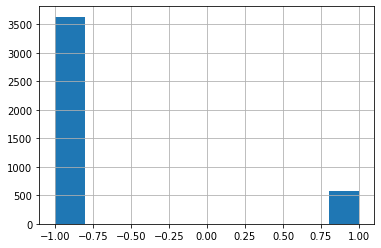

In [11]:
DataTotal['Cleveage'].hist()

In [ ]:
Alphabet = {'A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V'}

In [57]:
def splitted(data):
  Octamer = data['Octamer'].to_numpy()
  splitted = []
  for i in range(len(Octamer)):
    splitted.append(list(Octamer[i]))
  return splitted

In [11]:
splitted = splitted(DataTotal)

In [12]:
DataTotal1 = pd.DataFrame(splitted,columns = ['1','2','3','4','5','6','7','8'])

In [13]:
Data_encoded = pd.get_dummies(DataTotal1)

In [14]:
DataTotal['Cleveage'] = DataTotal['Cleveage'].replace({-1:0})

In [15]:
Data_encoded.shape

(4219, 160)

In [17]:
DataFinal = pd.concat([Data_encoded,Data['Cleveage']],axis = 1)

In [16]:
X = Data_encoded.to_numpy()
y = DataTotal['Cleveage'].to_numpy()

In [17]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
selector = SelectKBest(chi2, k=50)
X_new1 = selector.fit_transform(Data_encoded, DataTotal['Cleveage'])
cols = selector.get_support(indices=True)
features_X_new1 = Data_encoded.iloc[:,cols]

In [18]:
features_X_new1.columns

Index(['1_D', '1_P', '1_V', '2_C', '2_F', '2_L', '2_W', '2_Y', '3_D', '3_E',
       '3_G', '3_I', '3_K', '3_L', '3_P', '3_Q', '3_S', '3_V', '4_F', '4_I',
       '4_K', '4_L', '4_M', '4_P', '4_R', '4_T', '4_V', '4_Y', '5_D', '5_F',
       '5_G', '5_I', '5_K', '5_L', '5_M', '5_N', '5_P', '5_Q', '5_V', '6_D',
       '6_E', '6_G', '6_I', '6_P', '6_V', '7_F', '7_P', '8_D', '8_K', '8_R'],
      dtype='object')

In [ ]:
#May used over or undersampling strategy.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(sampling_strategy='majority')

X_under,y_under = under.fit_resample(X,y)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

over = RandomOverSampler(sampling_strategy='minority')

X_over,y_over = over.fit_resample(X,y)

In [90]:
X_new1 = selector.transform(X_under)

In [172]:
X_new1.shape

(1166, 50)

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X_new1, y_under, test_size=0.2, random_state=1)

In [173]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(160,activation = 'relu',input_shape=[50]))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(320,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1))

In [174]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 160)               8160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 320)               51520     
_________________________________________________________________
dropout_7 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 321       
Total params: 60,001
Trainable params: 60,001
Non-trainable params: 0
_________________________________________________________________


In [175]:
#optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [176]:
mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [177]:
epochs = 20
history = model.fit(X_train,y_train,batch_size = 10, epochs = epochs,validation_split = 0.2,callbacks = [mc])

Epoch 1/20
75/75 [==============================] - 0s 5ms/step - loss: 0.9500 - accuracy: 0.6604 - val_loss: 0.4586 - val_accuracy: 0.8342
Epoch 2/20
75/75 [==============================] - 0s 3ms/step - loss: 0.7207 - accuracy: 0.7785 - val_loss: 0.3837 - val_accuracy: 0.8824
Epoch 3/20
75/75 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.8188 - val_loss: 0.5691 - val_accuracy: 0.8770
Epoch 4/20
75/75 [==============================] - 0s 3ms/step - loss: 0.5586 - accuracy: 0.8792 - val_loss: 0.5580 - val_accuracy: 0.8770
Epoch 5/20
75/75 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.8685 - val_loss: 0.6175 - val_accuracy: 0.8930
Epoch 6/20
75/75 [==============================] - 0s 2ms/step - loss: 0.5044 - accuracy: 0.8658 - val_loss: 0.6006 - val_accuracy: 0.8930
Epoch 7/20
75/75 [==============================] - 0s 3ms/step - loss: 0.3999 - accuracy: 0.8644 - val_loss: 0.6810 - val_accuracy: 0.8984
Epoch 8/20
75/75 [==

In [178]:
# load a saved model
from keras.models import load_model
saved_model = load_model('best_model.h5')

In [179]:
y_test_predictNN = saved_model.predict_classes(X_test)

In [180]:
accuracy_score(y_test,y_test_predictNN)

0.8717948717948718

In [181]:
precision_score(y_test,y_test_predictNN)

0.8691588785046729

In [182]:
recall_score(y_test,y_test_predictNN)

0.8532110091743119

In [183]:
f1_score(y_test,y_test_predictNN)

0.861111111111111

In [184]:
y_train_predictNN = saved_model.predict_classes(X_train)

In [185]:
accuracy_score(y_train,y_train_predictNN)

0.9334763948497854

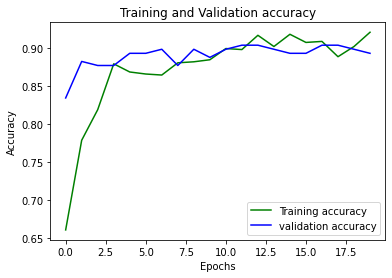

In [186]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
#epochs = range(1,21)
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

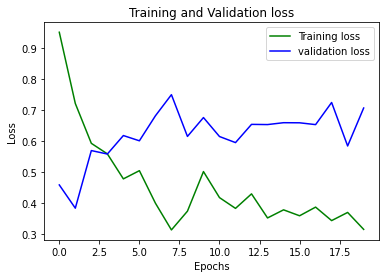

In [187]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
#epochs = range(1,21)
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [146]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(''.format(
      name=fn, length=len(uploaded[fn])))

Saving 1625Data.txt to 1625Data (1).txt



In [54]:
Dataset = pd.read_csv('1625Data.txt', sep=",",header = None)

In [55]:
Dataset = pd.DataFrame(Dataset.to_numpy(),columns = columns)

In [45]:
Dataset

,Octamer,Cleveage
0,SLNLRETN,1
1,AECFRIFD,1
2,HLVEALYL,1
3,TQIMFETF,1
4,AEELAEIF,1
...,...,...
1620,QMIFEEHG,1
1621,GWILAEHG,1
1622,QAIYLALQ,1
1623,DSADAEED,1


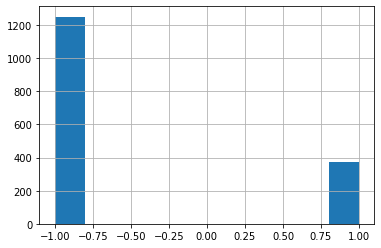

In [46]:
Dataset['Cleveage'].hist()

In [ ]:
def splitted(data):
  Octamer = data['Octamer'].to_numpy()
  splitted = []
  for i in range(len(Octamer)):
    splitted.append(list(Octamer[i]))
  return splitted

In [58]:
splitted1 = splitted(Dataset)

In [59]:
DataTotal2 = pd.DataFrame(splitted1,columns = ['1','2','3','4','5','6','7','8'])

In [60]:
Data_encoded1 = pd.get_dummies(DataTotal2)

In [61]:
Dataset['Cleveage'] = Dataset['Cleveage'].replace({-1:0})

In [62]:
X_prob = Data_encoded1.to_numpy()
y_prob = Dataset['Cleveage'].to_numpy()

In [188]:
X_prob1 = selector.transform(X_prob)

In [189]:
y_prob_predictNN = saved_model.predict_classes(X_prob1)

In [190]:
accuracy_score(y_prob,y_prob_predictNN)

0.8289230769230769

In [191]:
precision_score(y_prob,y_prob_predictNN)

0.5873873873873874

In [192]:
recall_score(y_prob,y_prob_predictNN)

0.8693333333333333

In [193]:
f1_score(y_prob,y_prob_predictNN)

0.7010752688172043

In [194]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_prob, y_prob_predictNN)

array([[1021,  229],
       [  49,  326]])

In [195]:
confusion_matrix(y_test,y_test_predictNN)

array([[111,  14],
       [ 16,  93]])